In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

***
___

In [31]:
def trees_(X,y,max_depth,criterion):
    # 2.
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=14)
    # 3.
    tree = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion).fit(X_train,y_train)
    # 4.
    tree_predict = tree.predict(X_test)
    # 5.
    print("""
    Train score: {}
    Test score:  {}
    accuracy:  {}
    
    """.format(tree.score(X_train,y_train),tree.score(X_test,y_test),accuracy_score(y_test,tree_predict)))
    
    fig = plt.figure(figsize=(25,20))
    plot_tree(tree, filled=True)
    plt.show()
    return tree

In [32]:
def random_forest_(X,y,n_estimators, max_depth, criterion):
    # 2.
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=14)
    # 3.
    forest = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,criterion=criterion).fit(X_train,y_train)
    # 4.
    forest_predict = forest.predict(X_test)
    # 5.
    print("""
    Train score: {}
    Test score:  {}
    accuracy:  {}
    
    """.format(forest.score(X_train,y_train),forest.score(X_test,y_test),accuracy_score(y_test,forest_predict)))
    
    return forest

***
___

In [33]:
data = pd.read_csv('test.csv').iloc[:,1:]

In [34]:
target_encoder = LabelEncoder()
target_encoded = target_encoder.fit(data['satisfaction'])
target_encoded = target_encoder.fit_transform(data['satisfaction'])



In [35]:
x1,x2,x3,x4 = data['Customer Type'],data['Age'],data['Class'],data['Flight Distance']

x1_encoder = LabelEncoder().fit(x1)
x1_encoded = x1_encoder.fit_transform(x1)

x3_encoder = LabelEncoder().fit(x3)
x3_encoded = x3_encoder.fit_transform(x3)



In [36]:
y = np.array(target_encoded)
X = np.array([x1_encoded,x2,x3_encoded,x4]).T

***
___

# Tree


    Train score: 0.7724566266297095
    Test score:  0.7750230982445334
    accuracy:  0.7750230982445334
    
    


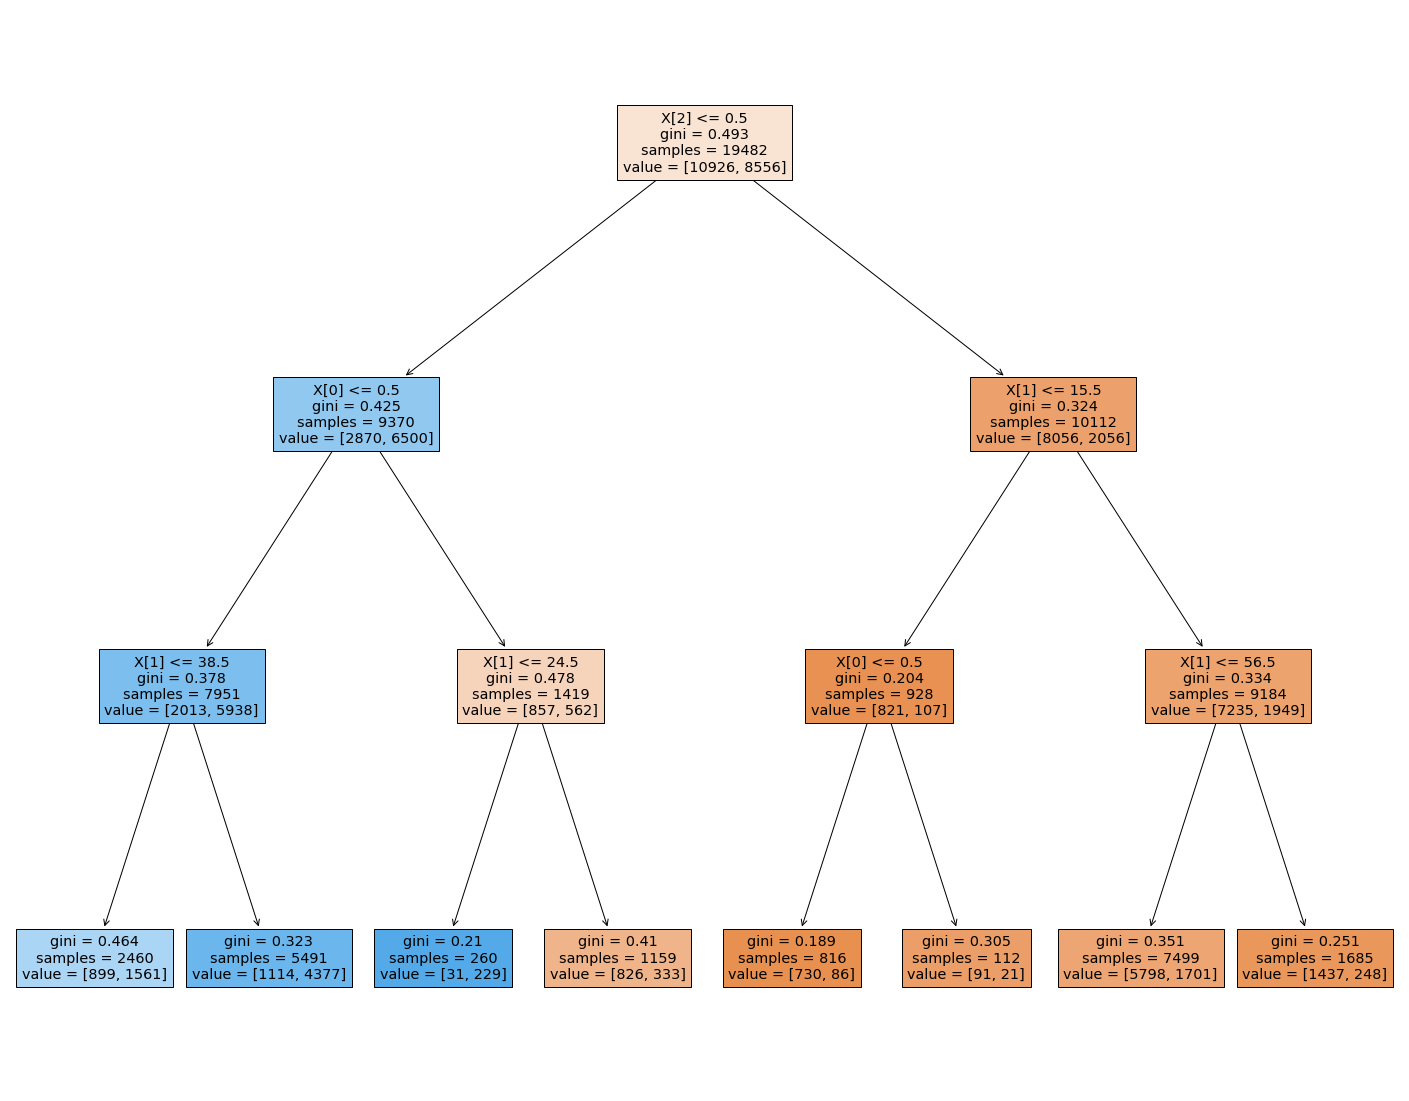

DecisionTreeClassifier(max_depth=3)

In [53]:
trees_(X=X,y=y,max_depth=3,criterion='gini')

# Forest

In [77]:
random_forest_(X=X,y=y,n_estimators=1000,max_depth=5,criterion='gini')


    Train score: 0.778410840776101
    Test score:  0.7761010163227595
    accuracy:  0.7761010163227595
    
    


RandomForestClassifier(max_depth=5, n_estimators=1000)

***
___

<h1><center> Ganancia de Información </center></h1>

La ganancia de información está asociada con que tan ``homogénea`` es una variable que permita tomar decisiones de tal manera que sacrifique la menor cantidad de información posible, por ejemplo. Si quiere clasificar si un animal vuela o se arrastra una variable del tipo ``¿tiene alas?`` presenta la menor pérdida de información que otra variable como ``¿Come semillas?``

# Entropía 

<h1> $$H(s) = \sum_{i=1}^{n} -P(y_{i})log_{2}(P(y_{i}))$$ </h1>
    
para n categorías de la variable objetivo $y$ con $P(y_{i})$ como la razón entre la ocurrencia de $i$ y el total de los datos

In [28]:
data['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [48]:
entropia_nodo_inicial = -1*(((14573/25976)*np.log2((14573/25976)))+((11403/25976)*np.log2((11403/25976))))
entropia_nodo_inicial

0.9892303495173416

### Ganancia de información

o incremento de la entropía

$$H(S,V) = H(S) - \sum_{x \in C}\frac{|V=x|}{|V|}H(V=c)$$

### Gini 

<h1>$$Gini =  1 -\sum P_{i}^{2}$$</h1>